# Handwriting Recognition using Logistic Regression

This project is my implementation in python of the week3 exercise of the Machine Learning Course I took on Cousera by Andrew Ng.<br>
The data supplied contains 5000 training examples of handwritten digits.<br>
Each example is a 20 by 20 pixel grey image of an handwritten digit between 0 and 9. <br>
The one vs all logistic regression algorithm is implemented to correctly classify the data

## Importing libraries

In [726]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import optimize as op


## Processing and viewing the image data

In [727]:
#loading data into variables m, X and y
#displaying sample images
data = sp.loadmat('ex3data1.mat')
y = data['y']
X = data['X']
m = X.shape[0]

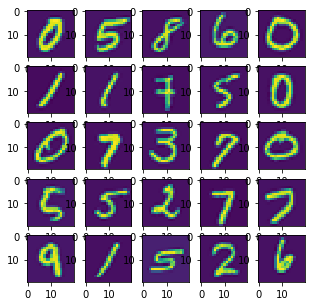

In [728]:
fig = plt.figure(figsize=(5, 5))
randArr = np.random.randint(5000, size=(25,1))#create an np array shape (25,1) of integers from less than 5000
j = 1
for i in randArr:
    i = int(i)
    img = X[i]
    img = img.reshape(20,20)
    img = img.T
    fig.add_subplot(5,5,j)
    plt.imshow(img)
    j += 1 
    

## One vs All logistic Regression

### Computing cost function and gradient

In [729]:
def sigmoid(theta,x):
    z = np.dot(x,theta)
    z = np.exp(-1 * z) + 1
    return 1 / z

def costFuncReg(theta,*args):
    theta = theta.reshape(theta.shape[0],1)
    y,x,lmd = args
    htheta = sigmoid(theta,x)
    cost = (1*y* np.log(htheta)) + (1-y)*np.log((1-htheta))
    reg = lmd/m * 0.5 * np.sum(np.square(theta[1:]))
    return -1*np.mean(cost) + reg
   
def costGradReg(theta,*args):
    y,x,lmd = args
    theta = theta.reshape(theta.shape[0],1)
    htheta = sigmoid(theta,x)
    grad = np.dot(x.T,(htheta-y))/m
    grad[1:] = grad[1:] + lmd/m * theta[1:]
    return grad.flatten()

### One vs All classification

In [730]:
labels = 10 # 10 labels of 0 - 9
inputSize = theta.shape[0]
allTheta = np.zeros([labels,inputSize])
Xi = np.append(np.ones((m,1)), X, axis = 1)
n = Xi.shape[1]
theta = np.zeros(n)

def oneVAll(lmd):
    for i in range(1,labels+1):
        yi = (y == i).astype(int)
        optimalTheta = op.fmin_cg(costFuncReg,theta,fprime = costGradReg,args=(yi,Xi,lmd), maxiter = 50,disp = 0)
        allTheta[i%10] = optimalTheta
        print('computed optimal theta for label', i%10)
    return allTheta

### Prediction and accuracy

In [731]:
Theta = oneVAll(0.1)
def predict(theta):
    predictions = sigmoid(theta.T,Xi)
    predictions = np.argmax(predictions, axis = 1)
    predictions = predictions.reshape(predictions.shape[0],1)
    return predictions
    
def accuracy():
    return print('The accuracy of the result is ',np.mean(predict(Theta)== y%10)*100, 'percent')

computed optimal theta for label 1
computed optimal theta for label 2
computed optimal theta for label 3
computed optimal theta for label 4
computed optimal theta for label 5
computed optimal theta for label 6
computed optimal theta for label 7
computed optimal theta for label 8
computed optimal theta for label 9
computed optimal theta for label 0


In [732]:
accuracy()

The accuracy of the result is  95.06 percent
